In [ ]:
# Installing required packages in the notebook
%pip install pandas matplotlib seaborn statsmodels scipy

In [3]:
# Importing necessary libraries for data analysis and visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

In [4]:
# Loading the NBA dataset from a CSV file
nba = pd.read_csv('nbaallelo.csv')

In [5]:
# Printing the column names to understand the structure of the dataset
print(nba.columns)

Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
       'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
       'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
       'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
      dtype='object')


In [6]:
data_types = nba.dtypes

In [7]:
# Checking the data type of the 'date_game' column
print(nba['date_game'].dtype)

object


In [8]:
# Converting relevant object columns to categorical and datetime types
nba = nba.dropna(subset=['date_game'])

In [9]:
# Converting relevant object columns to categorical and datetime types
nba['game_location'] = nba['game_location'].astype('category')

In [10]:
nba['game_result'] = nba['game_result'].astype('category')

In [11]:
nba['game_location'] = nba['game_location'].astype('category')

In [12]:
nba['game_result'] = nba['game_result'].astype('category')

In [13]:
# Creating sample dataframes to demonstrate data manipulation and merging
city_data1 = pd.DataFrame({'revenue': [1000, 1500], 'employee_count': [20, 25]}, index=['New York', 'Barcelona'])
city_data2 = pd.DataFrame({'revenue': [1200, 1700], 'employee_count': [22, 28]}, index=['London', 'Barcelona'])

In [14]:
# Concatenating sample dataframes to demonstrate combining data from multiple sources
all_city_data = pd.concat([city_data1, city_data2], sort=True)

In [23]:
# Creating a new column-wise dataframe for merging with existing dataframe
new_columns = pd.DataFrame({'population': [8500000, 1500000], 'language': ['English', 'Spanish']}, index=['New York', 'Barcelona'])

In [24]:
# Resetting index for proper concatenation
new_columns.reset_index(drop=True, inplace=True)

In [33]:
all_city_data = pd.concat([city_data1, city_data2], sort=True)

In [16]:
# Resetting index of 'all_city_data' for consistency after concatenation
all_city_data.reset_index(drop=True, inplace=True)

In [20]:
# Creating sample dataframes for demonstration of merging data
countries = pd.DataFrame({'country': ['USA', 'Spain'], 'continent': ['North America', 'Europe']})
cities = pd.DataFrame({'city': ['New York', 'Barcelona'], 'population': [8500000, 1500000], 'country': ['USA', 'Spain']})

# Merging dataframes on a common column ('country') to combine related information
merged_data = pd.merge(countries, cities, left_on='country', right_on='country')

In [21]:
# Grouping NBA dataset to analyze the points scored by the Knicks team each year
knicks_points = nba[nba['fran_id'] == 'Knicks'].groupby('year_id')['pts'].sum()

Step 5: Line Plot with Confidence Intervals
Adding confidence intervals to the Knicks' points journey! 📊


<Figure size 1200x800 with 0 Axes>

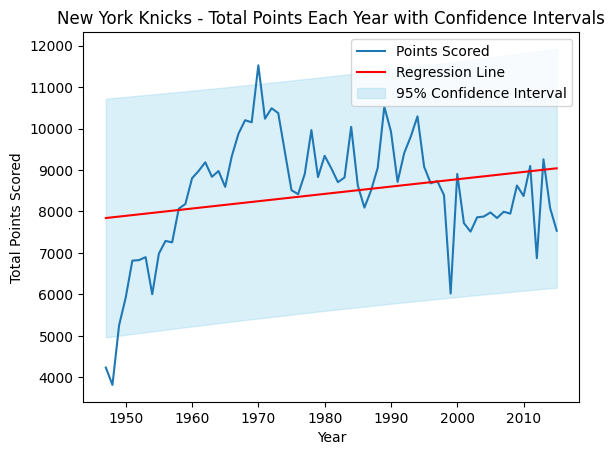

In [31]:
# Plotting a line chart with confidence intervals to visualize the Knicks' points journey over the years
# Utilizing Ordinary Least Squares (OLS) regression for trend analysis
plt.figure(figsize=(12, 8))
print("Step 5: Line Plot with Confidence Intervals")
print("Adding confidence intervals to the Knicks' points journey! 📊")
model = sm.OLS(knicks_points, sm.add_constant(knicks_points.index)).fit()
predictions = model.get_prediction()
predictions_summary_frame = predictions.summary_frame()
fig, ax = plt.subplots()
ax.plot(knicks_points.index, knicks_points.values, label='Points Scored')
ax.plot(knicks_points.index, predictions_summary_frame['mean'], label='Regression Line', color='red')
ax.fill_between(predictions_summary_frame.index, predictions_summary_frame['obs_ci_lower'], predictions_summary_frame['obs_ci_upper'], color='skyblue', alpha=0.3, label='95% Confidence Interval')
ax.legend()
ax.set_title('New York Knicks - Total Points Each Year with Confidence Intervals')
ax.set_xlabel('Year')
ax.set_ylabel('Total Points Scored')
plt.show()
print("\n")

<Axes: xlabel='year_id'>

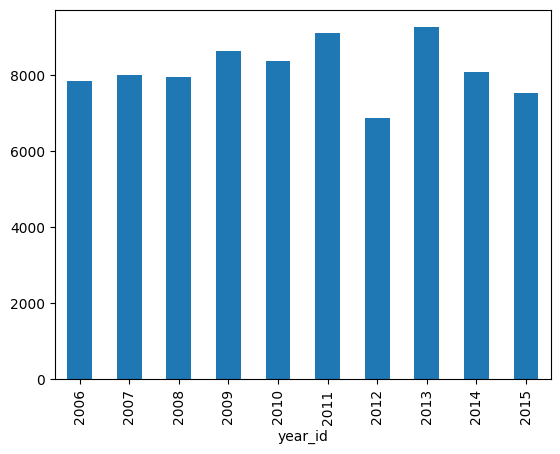

In [32]:
# Plotting a bar chart to visualize the Knicks' points scored in the last 10 years
knicks_points[-10:].plot(kind='bar')

<Axes: xlabel='pts', ylabel='opp_pts'>

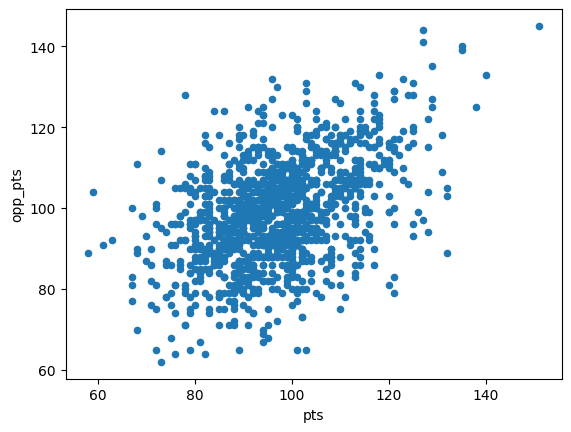

In [25]:
# Plotting a scatter plot to analyze the relationship between points scored and opponent points
nba[(nba['fran_id'] == 'Knicks') & (nba['year_id'] > 2000)].plot.scatter(x='pts', y='opp_pts', s=20)

<Axes: >

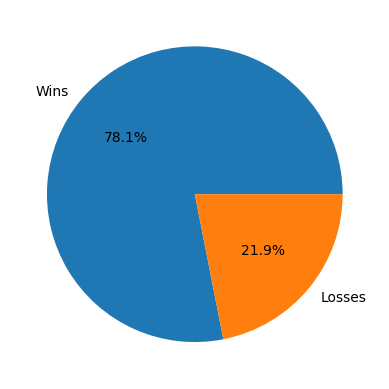

In [26]:
# Analyzing the performance of the Miami Heat team in 2013 using a pie chart
heat_2013 = nba[(nba['fran_id'] == 'Heat') & (nba['year_id'] == 2013)]
wins = heat_2013[heat_2013['game_result'] == 'W'].shape[0]
losses = heat_2013[heat_2013['game_result'] == 'L'].shape[0]
pd.Series([wins, losses], index=['Wins', 'Losses']).plot.pie(autopct='%1.1f%%')

In [27]:
# Performing hypothesis testing to determine if there's a significant difference in points scored before and after 2000
print("Hypothesis Testing: Is there a significant difference in points scored before and after 2000?")
before_2000 = knicks_points[knicks_points.index < 2000]
after_2000 = knicks_points[knicks_points.index >= 2000]
t_stat, p_value = stats.ttest_ind(before_2000, after_2000)
print(f"T-statistic: {t_stat}\nP-value: {p_value}")
if p_value < 0.05:
    print("Result: Reject the null hypothesis. There is a significant difference in points scored before and after 2000.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference in points scored before and after 2000.")
print("\n")

Hypothesis Testing: Is there a significant difference in points scored before and after 2000?
T-statistic: 1.110085440203727
P-value: 0.2709304927554875
Result: Fail to reject the null hypothesis. No significant difference in points scored before and after 2000.




In [28]:
# Performing regression analysis to predict points scored based on opponent points
print("Regression Analysis: Predicting points based on opposition points")
regression_data = nba[(nba['fran_id'] == 'Knicks') & (nba['year_id'] > 2000)].copy()
regression_data['const'] = 1  # Adding a constant term for the intercept
model = sm.OLS(regression_data['pts'], regression_data[['const', 'opp_pts']]).fit()
predictions = model.predict(regression_data[['const', 'opp_pts']])
print(model.summary())
print("\n")

Regression Analysis: Predicting points based on opposition points
                            OLS Regression Results                            
Dep. Variable:                    pts   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     327.4
Date:                Fri, 16 Feb 2024   Prob (F-statistic):           3.89e-65
Time:                        23:25:25   Log-Likelihood:                -4754.9
No. Observations:                1244   AIC:                             9514.
Df Residuals:                    1242   BIC:                             9524.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------